# 3. 유의성 검정

### 1) T-test

#### 가. 정규성 검정
 - Kolmogorov-Smirnov : $ n \geq 50 $
 - Q-Q Plot
 - Anderson-Darling
 - Sharpiro-Wilk : $ n \leq 50 $
 - Jarque-Bera
 
#### 나. 등분산 검정
 - F-test
 - Levene
 - Bartlett
 - Chi-Square
 
 ※ 등분산성을 만족하지 못할 때 : Welch 2 sample T-test
 
#### 다. 일표본 T 검정

#### 라. 독립표본 T 검정

#### 마. 대응표본 T 검정 (Paired T-test)

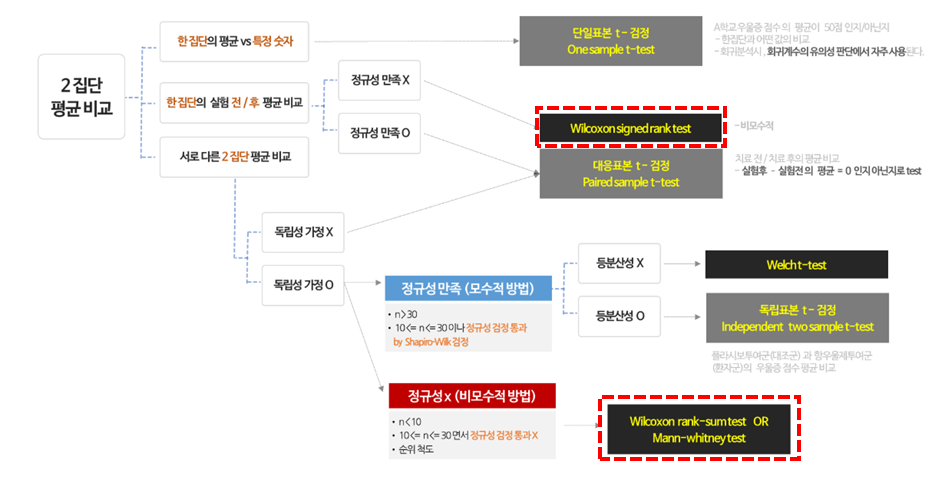

In [15]:
from IPython.display import Image
Image('C:/Users/LG/Desktop/python/img.png')

In [10]:
import pandas as pd
import numpy as np
cats = pd.read_csv('C:/Users/LG/Desktop/python/cats.csv')
cats.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


In [ ]:
## 윌콕슨
# 1) 두집단 연관 wilcoxon signed rank test (H0: 중위값이 0 이다)
# 2) 두집단 서로 독립 rank sum test
# (H0 : A와 B에서의 값은 같은 중앙값이 같은 연속된 분포에서 추출된 표본값을 가진다 = 두 모집단의 중앙값이 동일한지 여부를 검정)

In [14]:
import scipy.stats as stats

# 1. 일표본 t 검정
from scipy.stats import shapiro 
shapiro(cats['Bwt']) # 정규성 검정 (H0: 정규성가짐)
stats.ttest_1samp(cats['Bwt'], mu) # 정규성 만족
stats.wilcoxon(x_variable-mu, alternative='two-sided') # 정규성 만족X


# 2. 대응표본 T검정 : 영양제 복용 전과 후의 시간 측정(영양제 효과검증)
stats.ttest_rel(x_pre, x_post, alternative='greater')
stats.wilcoxon(x_pre, x_post, alternative) # 정규성 만족X


# 3. 독립표본 t검정 : 두개 독립된 모집단 평균 비교(등분산성 가정 필요, H0: 모평균 차이 없음)
stats.levene(x1, x2) # 등분산 검정(H0 : 등분산만족)
stats.ttest_ind(x1, x2, equal_var=True)
stats.wilcoxon(x1, x2, alternative='two-sided') # 정규성 만족X
stats.ttest_ind(x1, x2, equal_var=False) # 등분산성 만족X

WilcoxonResult(statistic=0.0, pvalue=2.096734736413612e-25)

In [ ]:
## 1. 일원배치 분산분석 : 두개이상 다수 평균 비교(x:범주형, y:연속형), 모집단 서로 독립, 정규분포(샤피로), 등분산(레빈)

# 정규성
stats.shapiro(x1) # 각 변수별로 다 정규성 만족하는지 검정
stats.kruskal(x1, x2, x3)# 크루스칼-왈리스 순위합 검정 집단별 정규성 하나라도 만족하지 않는 경우 실행

# 등분산
stats.levene(x1, x2, x3) # 등분산 검정
import pingun as pg
pg.welch_anova(dv='petal_width', between='species', data=iris) # 등분산 만족X
stats.f_oneway(x1, x2, x3) # 분산분석

# 사후검정 - 1) tuekey : 집단 내 관측치 수가 동일한 경우 사용
from statsmodel.stats.multicomp import pairwise_tukeyhsd
from statsmodel.stats.multicomp import MultiComparison
mc = MultiComparison(data=iris['sepal_width'], groups=iris['target'])
tuekeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tuekeyhsd.plot_simultaneous()
tuekeyhsd.summary()

# 사후검정 - 2) Bonferroni :집단 내 관측치 수가 동일하지 않은 경우 사용
from statsmodels.sandbox.stats.multicomp import MultiComparison
mc = MultiComparison(data=iris['sepal_width'], groups=iris['target'])
mc.allpairtest(scipy.stats.ttest_ind, method = 'bonf')[0]




## 2. 이원배치 분산분석 : 교호작용 효과도 봄
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'mpg ~ C(cyl) + C(am) + C(cyl):C(am)'
model = ols(formula, mtcars).fit()
aov_table = anova_lm(model, typ=2)
aov_table

# 교호작용효과-graph
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig, ax = plt.subplot(figsize=(6,6))
fig = interaction_plot(cyl, am, mpg, color=['red','blue'], maker=['D','^'], ms=10, ax=ax) # 상호작용 그래프에서 두 선 교차하고 있는 경우 상호작용효과 존재로 볼 수 있음

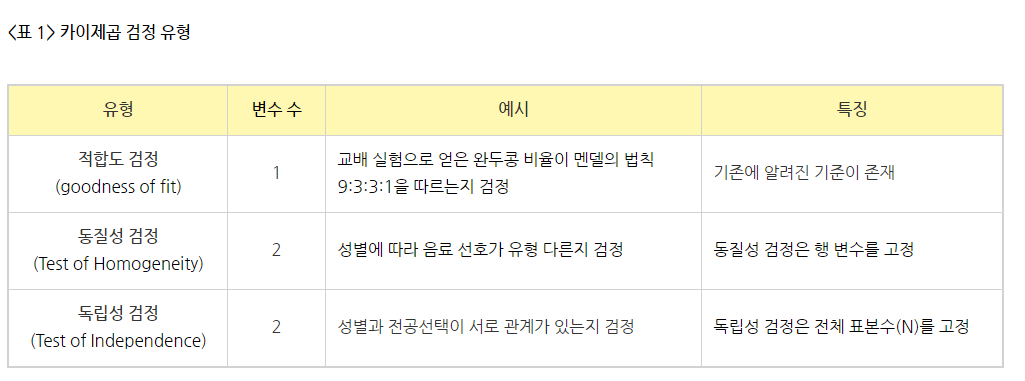

In [23]:
## 교차분석 (x:범주형)
Image('C:/Users/LG/Desktop/python/chi.png')

In [ ]:
# 1. 적합도 검정 H0: 생존자 중 남자비율 50%, 여자비율 50%이다
df_t = df[df['survived']==1]
table = df_t[['sex']].value_counts()

from scipy.stats import chisquare
chi = chisquare(table, f_exp=[171,171]) # chisquare(관찰빈도, 각범주의기대빈도, ddof=0(k-1), axis=0)
print('적합도 검정\n', chi)

# 2. 독립성 검정 : 모집단이 두개의 변수 a,b에 의해 범주화되었을때 이 두 변수들 차이 관계가 독립인지 아닌지 검정
# 비만에 따른 질환 비율에 차이가 존재?
table = pd.crosstab(df['class'], df['survived']) # class변수와 survived변수는 독립이다 아니다

from scipy.stats import chi2_contingency
chi, p, df, expect = chi2_contingency(table)
print('Statistic:', chi)
print('p-value:', p)
print('df:', df)
print('expect: \n', expect)

# 3. 동질성 검정 : class의 분포는 survived에 관계없이 동일하지 않다 = 독립성 검정과 방법 동일

### 4) 다중검정

#### 다중검정?

여러 개의 가설검정을 동시에 수행하는 것(ex 정상인과 환자간의 유의한변수들을 식별하기위해 데이처 피쳐갯수만큼의 가설검정하는 것) 
ANOVA 실시 후의 다중비교가 해당됨.

다중검정의 문제 : 가설의 수가 많아질수록 전체 오류율이 커지게 되는 문제 발생 ==> 전체오류율 유지하는방법 필요(아래방법들)

#### 가. FWER 통제  → 사후분석 참고(Bonferroni)

#### 나. FDR (False Discovery Rate) 조절
유의미한 결과 얻기 위한 유의수준 조절하는 방법

 - Benjamini-Hochberg (FDR 추정)
 
 ※ $ FDR = E(\frac{False \; Positives}{Total \; Positives}) $

In [3]:
# Benjamini-Hochberg
    # 개별 가설들의 p-value를 정렬한 후, 이에 대해 긱각 다른 Cutoff를 적용한다.
    # p-value가 낮을수록 더 엄격한 Cutoff가 적용됨. (FDR을 0.05로 고정)
from statsmodels.stats.multitest import fdrcorrection

p_val = anova_lm(model2).iloc[:, -1].values

adj_p_val = fdrcorrection(p_val, alpha = 0.05)
print(adj_p_val)

### 5) 공분산분석, 상관분석

#### 가. 공분산분석 (ANCOVA / Analysis of Covariance)

 - 공변량 : 종속변수에 영향을 주는 독립변수 외의 잡음인자에 대한 변량
 - Noise를 통제하여 본래 비교하고 싶었던 독립변수와 종속변수 간의 관계를 순수하게 비교한다. (분산분석과 회귀분석의 혼합 형태)
 - Step  
   ① 독립변수와 종속변수에 대한 회귀분석 실시  
   ② 잔차에 대한 ANOVA 실시
 - Assumption  
   ① 정규성 / ② 등분산성 / ③ 독립성  
   ④ 회귀계수의 동질성 (Homogeneity, 공변량과 독립변수 간의 교호작용 없음)

#### 나. 상관분석

 - Pearson : 일반적(공분산 기반으로하므로 등간척도/비율척도 사용한 변수에만 적용가능)
 - Spearman : 서열척도 or 두변수간 관계 비선형적일 떄 구함
 - Kendalls' Tau

In [32]:
# ANCOVA
df4 = pd.DataFrame({'methodology': np.repeat(['A', 'B', 'C'], 4),
                     'current_grade': [67, 88, 75, 85,
                                       92, 77, 74, 88,
                                       91, 88, 82, 80],
                     'test_score': [77, 89, 74, 69,
                                    88, 93, 94, 90,
                                    85, 81, 83, 79]})

display(df4)

from pingouin import ancova

result = ancova(data = df4, dv = 'test_score', covar = 'current_grade'
               , between = 'methodology')

result

,methodology,current_grade,test_score
0,A,67,77
1,A,88,89
2,A,75,74
3,A,85,69
4,B,92,88
5,B,77,93
6,B,74,94
7,B,88,90
8,C,91,85
9,C,88,81


,Source,SS,DF,F,p-unc,np2
0,methodology,387.510992,2,6.005703,0.025542,0.600228
1,current_grade,1.404669,1,0.043540,0.839927,0.005413
2,Residual,258.095331,8,NaN,NaN,NaN


 - SS : Sum of Squares
 - p-unc : Uncorrected P-value
 - np2 : Partial $\eta$-squared

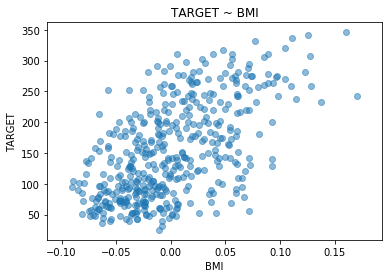

In [38]:
## 산점도 

from sklearn import datasets
import scipy.stats as stats

df5_temp = datasets.load_diabetes()
df5 = pd.DataFrame(data = df5_temp['data'], index = df5_temp['target']
                  , columns = df5_temp['feature_names'])


X = df5.bmi.values
Y = df5.index.values

import matplotlib.pyplot as plt
plt.scatter(X, Y, alpha=0.5)
plt.title('TARGET ~ BMI')
plt.xlabel('BMI')
plt.ylabel('TARGET')
plt.show()

In [39]:
# 1. 공분산
# 공분산은 상관관계의 상승 혹은 하강하는 경향을 이해할 수는 있으나 2개 변수의 측정 단위의 크기에 따라 값이 달라지므로 절대적 정도를 파악하기에는 한계
cov = (np.sum(X*Y) - len(X)*np.mean(X)*np.mean(Y))/len(X)
np.cov(X,Y)[0,1]

# 2. 상관계수
corr = cov / (np.std(X) * np.std(Y))

np.corrcoef(X,Y)[0,1] # 피어슨상관계수
import scipy.stats
scipy.stats.spearmanr(X,Y).correlation
scipy.stats.



# 3. 상관계수 검정 : 상관계수 값 자체가 유의미한가?
import scipy.stats as stats
stats.pearsonr(X,Y) # corr / p-value

2.1480435755297007

## 확률분포 함수

In [27]:
# 1. 베르누이
rv = stats.bernoulli(p)
rv.pmf([0,1]) # 해당값을 취하는 확률변수

rv.cdf([0,1]) # 누적밀도함수
rv.mean(), rv.var()

# 2. 이항분포
from scipy.special import comb # combination 구하기
comb(n, x)
stats.binom(n,p)

# 3. 기하분포
stats.geom(p)

# 4. 포아송분포 : np.exp(-lam) * np.power(lam, x) / factorial(x)
stats.poisson(lam)

# 5. 정규분포 
rv = stats.norm(mean, sd)
rv.pdf(2)
rv.cdf(2) # p(X<=2)
rv.isf(a) # 상위 100a점 p(X>=x) = a를 만족하는 x를 구함 = Za
rv.interval(0.9) # p(a<=X<=b) = 90%(100*alpha % 구간)


(0.3, 0.21)

In [ ]:
## 계산용 함수
from scipy.special import comb # combination 구하기
from scipy.special import factorial
comb(n, x)
np.power(lam,x)
factorial(x)

In [ ]:
## 신뢰구간

# 1. 정규분포의 모평균 구간추정 : 모분산 아는 경우, 신뢰수준100(1-alpha)% 신뢰구간 : z(a/2) / z(1-a/2)
rv = stats.norm()
lcl = 표본평균 - rv.isf(0.025) * np.sqrt(모집단분산/n) # 95% 신뢰구간 (a=0.05/2, 1-0.05/2)
ucl = 표본평균 + rv.isf(0.025) * np.sqrt(모집단분산/n)

# 2. 정규분포의 모평균 구간추정 : 모분산 모르는 경우
rv= stats.t(df=n-1)
lcl = 표본평균 - rv.isf(0.025) * np.sqrt(s^2/n)

# 3. 정규분포의 모분산 구간추정
rv = stats.chi2(df=n-1)
lcl = (n-1) * s^2 / rv.isf(0.025)
ucl = (n-1) * s^2 / -1*rv.isf(0.025) # (n-1) * s^2 / rv.isf(0.975)

In [29]:
# 표준정규분포, 95% 구간값
rv = stats.norm()
rv.interval(0.95)

(-1.959963984540054, 1.959963984540054)